In [1]:
# importing libraries - essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials
import seaborn           as sns # enhanced data viz

# importing libraries - machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
got = pd.read_excel('./GOT_character_predictions.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


In [2]:
# pulling up data dictionary
got_description = pd.read_excel('./got_data_dictionary.xlsx')


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [3]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

In [4]:
#checking the shape of dataset
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1836
Features:     23



In [5]:
#checking the descriptive statistics for numeric data
got.describe()

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.000000,1836.000000,391.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,21.000000,26.000000,23.000000,256.000000,410.000000,1836.000000,1836.000000
mean,918.500000,0.611111,1717.910486,0.190632,0.580065,0.465686,0.365468,0.375817,0.714286,0.192308,0.652174,0.765625,-1368.041463,0.084002,0.730392
std,530.151865,0.487631,20587.045299,0.392906,0.493682,0.498957,0.481692,0.484465,0.462910,0.401918,0.486985,0.424437,20104.311100,0.152460,0.443877
min,1.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000
25%,459.750000,0.000000,237.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.013378,0.000000
50%,918.500000,1.000000,267.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,27.000000,0.030100,1.000000
75%,1377.250000,1.000000,285.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,49.750000,0.083612,1.000000
max,1836.000000,1.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000


In [6]:
# INFOrmation about each variable
got.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book2_A_Clash_Of_Kings      1836 non-null   int64  
 13  book3_A_Storm_Of_Swords     1836 

In [7]:
#checking the correlation of all the columns with the response variable 
got_corr = got.corr().round(2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveSpouse                 0.38
book2_A_Clash_Of_Kings        0.26
isAliveMother                 0.20
isAliveHeir                   0.16
age                           0.12
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
isAliveFather                -0.04
dateOfBirth                  -0.08
book4_A_Feast_For_Crows      -0.08
S.No                         -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

In [8]:
#checking the list of all columns
list(got.columns)

['S.No',
 'name',
 'title',
 'male',
 'culture',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isAliveFather',
 'isAliveMother',
 'isAliveSpouse',
 'isAliveHeir',
 'age',
 'popularity',
 'isAlive']

In [9]:
#checking the normalized value counts of those alive 
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [10]:
# imputing missing values in categorical variables 
got['title'].fillna('unknown_title', inplace = True)
got['culture'].fillna("unknown_culture", inplace = True)
got['house'].fillna('unknown_house', inplace = True)


# checking results
got['title'].isna().any(axis = 0)
got['culture'].isna().any(axis = 0)
got['house'].isna().any(axis = 0)

False

In [11]:
# checking value counts for title
got['title'].value_counts(normalize = False,
                                        ascending = False)

unknown_title                                                  956
Ser                                                            365
Maester                                                         37
Archmaester                                                     21
Lord                                                            19
Septon                                                          17
Winterfell                                                      17
Lady                                                            12
Princess                                                        12
Septa                                                           10
King in the North                                                9
Lord Commander of the Night's Watch                              9
Grand Maester                                                    8
Prince                                                           8
Cupbearer                                                     

In [12]:
# checking the value counts for culture
got['culture'].value_counts(normalize = False,
                                        ascending = False) # some cultures can be grouped

unknown_culture            1209
Northmen                    118
Ironborn                    105
Free Folk                    50
Valyrian                     43
Braavosi                     41
Dornish                      21
Dothraki                     21
Ghiscari                     21
Rivermen                     16
Valemen                      16
Reach                        15
Vale mountain clans          14
Westeros                     12
Dornishmen                   11
Free folk                    10
Westerman                     9
northmen                      9
Tyroshi                       7
Stormlands                    6
Northern mountain clans       5
Qartheen                      5
Astapori                      4
Summer Isles                  4
Westermen                     4
Ironmen                       4
Meereenese                    3
First Men                     3
Lysene                        3
Pentoshi                      3
Crannogmen                    3
Wildling

In [13]:
#  checking the value counts for house column
got['house'].value_counts(normalize = False,
                                        ascending = False) 

unknown_house                              414
Night's Watch                              101
House Frey                                  95
House Stark                                 70
House Targaryen                             58
House Lannister                             45
House Greyjoy                               37
House Tyrell                                33
House Martell                               23
House Osgrey                                21
Faith of the Seven                          16
House Hightower                             16
House Arryn                                 15
House Bracken                               14
House Botley                                13
House Baratheon                             12
House Florent                               12
House Tully                                 12
House Velaryon                              11
House Whent                                 11
House Bolton                                10
House Crakeha

In [14]:
# Feature engineering for culture
#looping through names to assign a culture 
for index, val in got.iterrows():
    
    # checking for Lannister in name and assigning Andal culture
    if 'Lannister' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Andal'
    
     # checking for Targaryen in name and assigning Valyrian culture
    elif 'Targaryen' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Valyrian'
    
     # checking for Tyrell in name and assigning Andal culture
    elif 'Tyrell' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Andal'
    
     # checking for Frey in name and assigning Riverlands culture
    elif 'Frey' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Riverlands'  
    
    # checking for Beesbury in name and assigning Reach culture
    elif 'Beesbury' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Reach' 
    
     # checking for Belmore in name and assigning Vale culture
    elif 'Belmore' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Vale'
    
    # checking for Blackwood in name and assigning Riverlands culture
    elif 'Blackwood' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'RiverLands' 
    
    # checking for Bracken in name and assigning Riverlands culture
    elif 'Bracken' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'RiverLands'
    
    # checking for Brax in name and assigning Westermen culture
    elif 'Brax' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Westermen'
    
    # checking for Caswell in name and assigning Reach culture
    elif 'Caswell' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Reach'
    
    # checking for Corbray in name and assigning Vale culture
    elif 'Corbray' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Vale'
    
    # checking for Costayne in name and assigning Reach culture
    elif 'Costayne' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Reach'
    
    # checking for Crakehall in name and assigning Westernmen culture
    elif 'Crakehall' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'Westermen'
    
    # checking for Vance in name and assigning Riverlands culture
    elif 'Vance' in got.loc[ index , 'name']:
        got.loc[index, 'culture'] = 'RiverLands'       

In [15]:
# Grouping the different names of culture
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans']
}

#creating a user-defined function
def get_cult(value):
    value = str(value).lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

#applying the udf to create a cleaned culture column
got.loc[:, "culture"] = [get_cult(x) for x in got["culture"]]

In [16]:
#replacinf the cultures with space 
got['culture'] = got['culture'].str.replace(" ", "")

In [17]:
# looping to group the titles 
for index, val in got.iterrows():
    
    # checking for King
    if 'King' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'King'
    
    # checking for Lord
    elif 'Lord' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Lord'
    
    # checking for Captain
    elif 'Captain' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Captain'
    
    # checking for Queen
    elif 'Queen' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Queen'
    
     # checking for Prince
    elif 'Prince' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Prince'
    
     # checking for Master
    elif 'Master' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Master'
    
    # checking for Sept
    elif 'Sept' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Sept'
    
     # checking for Khal
    elif 'Khal' in got.loc[ index , 'title']:
        got.loc[index, 'title'] = 'Khal'    
         

#checking the value counts of the grouped title
got['title'].value_counts()

unknown_title                      956
Ser                                365
Lord                                79
Maester                             37
Prince                              29
Sept                                28
King                                26
Archmaester                         21
Winterfell                          17
Lady                                12
Queen                               11
Khal                                10
Grand Maester                        8
Cupbearer                            8
Master                               8
Captain                              5
Wisdom                               5
Casterly Rock                        5
Bloodrider                           5
Knight                               5
Eyrie                                4
Harrenhal                            4
Starpike                             3
Karhold                              3
First Ranger                         3
Duskendale               

In [18]:
# looping to assign House Targaryen and House Stark to people with the same name
for index, val in got.iterrows():
    
    # checking for Targaryen.
    if 'Targaryen' in got.loc[ index , 'name']:
        got.loc[index, 'house'] = 'House Targaryen'
        
    # checking for Stark.
    elif 'Stark' in got.loc[ index , 'name']:
        got.loc[index, 'house'] = 'House Stark'

In [19]:
# printing the mean ages of males, females and kings 
print(f"""
Mean Age:                     {round(got.loc[ : , 'age'].mean(),1)}
Mean Male Age:                {round(got.loc[ : , 'age'][got['male'] == 1].mean(),1)}
Mean Female Age:              {round(got.loc[ : , 'age'][got['male'] == 0].mean(),1)}
Mean King Age:                {round(got.loc[ : , 'age'][got['title'] == 'King'].mean(),1)}
""")


Mean Age:                     -1368.0
Mean Male Age:                -2196.2
Mean Female Age:              37.7
Mean King Age:                26.2



In [20]:
#replacing the negative values of age with 0 assuming that the character is not born
got['age'] = np.where((got['age'] < 0 ),0 ,got.age)

In [21]:
# defining variables that has the grouped title and are males

# storing average age for male with title King
king_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'King']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with title Ser
ser_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Ser']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with title Lord
lord_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Lord']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with title Maester
maester_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Maester']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with title Prince
prince_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Prince']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with title Sept
sept_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Sept']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)



# imputing missing values for age
for index, val in got.iterrows():

    
    # imputing age for males with king_avg_age
    if str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'King':
        
           got.loc[index, 'age'] = king_avg_age
            
    

    # imputing age for males with ser_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'Ser':
        
           got.loc[index, 'age'] = ser_avg_age
    
    
    # imputing age for males with lord_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'Lord':
        
           got.loc[index, 'age'] = lord_avg_age

            
    # imputing age for males with maester_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'Maester':
        
           got.loc[index, 'age'] = maester_avg_age
    
    # imputing age for males with prince_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'Prince':
        
           got.loc[index, 'age'] = prince_avg_age
    
    # imputing age for males with sept_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'title'] == 'Sept':
        
           got.loc[index, 'age'] = sept_avg_age

# ensuring missing values for age are taken care of
print(f"Remaining missing values for age: {got.loc[ :, 'age'].isnull().sum()}")

Remaining missing values for age: 1101


In [22]:
# defining variables that has the grouped title and are females

# storing average age for female with title King
king_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'King']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with title Ser
ser_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Ser']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with title Lord
lord_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Lord']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with title Maester
maester_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Maester']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with title Prince
prince_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Prince']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with title Sept
sept_avg_age = round(got.loc[ : , 'age']\
                           [got['title'] == 'Sept']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)



# imputing missing values for age
for index, val in got.iterrows():

    
    # imputing age for females with king_avg_age
    if str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'King':
        
           got.loc[index, 'age'] = king_avg_age
            
    

    # imputing age for females with king_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'Ser':
        
           got.loc[index, 'age'] = ser_avg_age
    
    
     # imputing age for females with lord_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'Lord':
        
           got.loc[index, 'age'] = lord_avg_age

            
    # imputing age for females with maester_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'Maester':
        
           got.loc[index, 'age'] = maester_avg_age
    
     # imputing age for females with prince_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'Prince':
        
           got.loc[index, 'age'] = prince_avg_age
    
    # imputing age for females with sept_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'title'] == 'Sept':
        
           got.loc[index, 'age'] = sept_avg_age

# ensuring missing values for age are taken care of
print(f"Remaining missing values for age: {got.loc[ :, 'age'].isnull().sum()}")

Remaining missing values for age: 985


In [23]:
# storing average age for males with a specific culture 

# storing average age for male with a culture Northmen
nor_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Northmen']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Ironborn
iron_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Ironborn']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Freefolk
fr_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'FreeFolk']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Valyrian
valy_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Valyrian']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Braavosi
bra_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Braavosi']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Dornish
dor_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Dornish']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Vale
vale_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Vale']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Ghiscari
ghi_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Ghiscari']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Dothraki
dot_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Dothraki']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Riverlands
river_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'RiverLands']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Westermen
we_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Westermen']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# storing average age for male with a culture Reach
re_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Reach']\
                           [got['male'] == 1].mean(),
                            ndigits = 1)

# imputing missing values for age
for index, val in got.iterrows():

    
     # imputing age for males with nor_avg_age
    if str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Northmen':
        
           got.loc[index, 'age'] = nor_avg_age
            
    

    # imputing age for males with iron_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Ironborn':
        
           got.loc[index, 'age'] = iron_avg_age
    
    
    # imputing age for males with fr_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'FreeFolk':
        
           got.loc[index, 'age'] = fr_avg_age

            
    # imputing age for males with valy_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Valyrian':
        
           got.loc[index, 'age'] = valy_avg_age
    
    # imputing age for males with bra_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Braavosi':
        
           got.loc[index, 'age'] = bra_avg_age
    
    # imputing age for males with dor_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Dornish':
        
           got.loc[index, 'age'] = dor_avg_age
        
    # imputing age for males with vale_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Vale':
        
           got.loc[index, 'age'] = vale_avg_age
            
    # imputing age for males with ghi_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Ghiscari':
        
           got.loc[index, 'age'] = ghi_avg_age
            
    # imputing age for males with dot_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Dothraki':
        
           got.loc[index, 'age'] = dot_avg_age
            
      # imputing age for males with river_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'RiverLands':
        
           got.loc[index, 'age'] = river_avg_age

     # imputing age for males with we_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Westermen':
        
           got.loc[index, 'age'] = we_avg_age
            
   # imputing age for males with re_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 1 and \
           got.loc[index, 'culture'] == 'Reach':
        
           got.loc[index, 'age'] = re_avg_age
            
            
            
# ensuring missing values for age are taken care of
print(f"Remaining missing values for age: {got.loc[ :, 'age'].isnull().sum()}")

Remaining missing values for age: 746


In [24]:
# storing average age for females with a specific culture 

# storing average age for female with a culture Northmen
nor_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Northmen']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Ironborn
iron_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Ironborn']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Freefolk
fr_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'FreeFolk']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Valyrian
valy_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Valyrian']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Braavosi
bra_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Braavosi']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Dornish
dor_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Dornish']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Vale
vale_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Vale']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Ghiscari
ghi_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Ghiscari']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Dothraki
dot_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Dothraki']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Riverlands
river_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'RiverLands']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Westermen
we_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Westermen']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# storing average age for female with a culture Reach
re_avg_age = round(got.loc[ : , 'age']\
                           [got['culture'] == 'Reach']\
                           [got['male'] == 0].mean(),
                            ndigits = 0)

# imputing missing values for age
for index, val in got.iterrows():

    
    # imputing age for females with nor_avg_age
    if str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Northmen':
        
           got.loc[index, 'age'] = nor_avg_age
            
    

    # imputing age for females with iron_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Ironborn':
        
           got.loc[index, 'age'] = iron_avg_age
    
    
    # imputing age for females with fr_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'FreeFolk':
        
           got.loc[index, 'age'] = fr_avg_age

            
     # imputing age for females with valy_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Valyrian':
        
           got.loc[index, 'age'] = valy_avg_age
    
     # imputing age for females with bra_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Braavosi':
        
           got.loc[index, 'age'] = bra_avg_age
    
     # imputing age for females with dor_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Dornish':
        
           got.loc[index, 'age'] = dor_avg_age
        
    # imputing age for females with vale_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Vale':
        
           got.loc[index, 'age'] = vale_avg_age
            
    # imputing age for females with ghi_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Ghiscari':
        
           got.loc[index, 'age'] = ghi_avg_age
            
   # imputing age for females with dot_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Dothraki':
        
           got.loc[index, 'age'] = dot_avg_age
            
    # imputing age for females with river_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'RiverLands':
        
           got.loc[index, 'age'] = river_avg_age

    # imputing age for females with we_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Westermen':
        
           got.loc[index, 'age'] = we_avg_age
            
    # imputing age for females with re_avg_age
    elif str(got.loc[index, 'age']).lower()    == 'nan'    and \
           got.loc[index, 'male']             == 0 and \
           got.loc[index, 'culture'] == 'Reach':
        
           got.loc[index, 'age'] = re_avg_age
            
                       
# ensuring missing values for age are taken care of
print(f"Remaining missing values for age: {got.loc[ :, 'age'].isnull().sum()}")

Remaining missing values for age: 567


In [25]:
#imputing the null values with the mean of age
got['age'] = got['age'].fillna(got['age'].mean())

#checking that null values are taken care of
print(f"Remaining missing values for age: {got.loc[ :, 'age'].isnull().sum()}")

Remaining missing values for age: 0


In [26]:
# placeholder for 'child' feature
got['child'] = 0


# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'age'] < 18:
        got.loc[index, 'child'] = 1


# checking results
got['child'].value_counts(normalize = False,
                              sort      = False,
                              ascending = False)

0    1728
1     108
Name: child, dtype: int64

In [27]:
# one hot encoding culture
one_hot_culture        = pd.get_dummies(got['culture'])

# dropping culture after they've been encoded
got = got.drop('culture', axis = 1)

# joining codings together
got = got.join([one_hot_culture])

In [28]:
#dropping house no need to be hot encoded
got = got.drop(['house'], axis=1)

In [29]:
# one hot encoding title
one_hot_title       = pd.get_dummies(got['title'])

# dropping title after they've been encoded
got = got.drop('title', axis = 1)

# joining codings together
got = got.join([one_hot_title])

In [30]:
# creating a copy of original data
got_copy = got.copy(deep=False)

got_copy.head(n=5)

,S.No,name,male,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive,child,Andal,Asshai,Astapor,Astapori,Braavosi,Crannogmen,Dornish,Dothraki,FreeFolk,Ghiscari,Ironborn,Lhazareen,Lhazarene,Lysene,Mereen,Myrish,Naathi,NorthernMountainClans,Northmen,Norvoshi,Pentoshi,Qartheen,Qohor,Reach,Rhoynar,RiverLands,Sistermen,Stormlander,SummerIslands,Tyroshi,Unknown_Culture,Vale,Valyrian,Westermen,Westerosi,Wildlings,Acorn Hall,Andals,Arbor,Archmaester,Ashford,Banefort,Barrowton,Bear Island,Big BucketThe Wull,Bitterbridge,Black Wind,Blackcrown,Blackmont,Blacktyde,Bloodrider,Blue Grace,Brightwater,Broad Arch,Brother,BrotherProctor,Captain,Castellan,Castellan of Harrenhal,CastellanCommander,Casterly Rock,Castle Lychester,Cerwyn,Chief Undergaoler,Claw Isle,Cobblecat,Coldmoat,Coldwater Burn,Commander of the City Watch,Commander of the Second Sons,Crag,Crakehall,Cupbearer,Darry,Deepwood Motte,Dragonstone,Duskendale,Dyre Den,Eastwatch-by-the-Sea,Eyrie,Fair Isle,Feastfires,Felwood,First Builder,First Ranger,First Sword of Braavos,Foamdrinker,Ghost Hill,Godsgrace,Godswife,Golden Storm,Golden Tooth,Goldengrove,Goldgrass,Goodman,Goodwife,Grand Maester,Grassy Vale,Green Grace,Greenshield,Greenstone,Grey Glen,Greywater Watch,Gulltown,Harrenhal,Harridan Hill,Hayford,Heart's Home,High Steward of Highgarden,Highgarden,Hightower,Horn Hill,Hornvale,Hornwood,Iron Islands,Ironoaks,Karhold,Karl's Hold,Kayce,Keeper of the Gates of the Moon,Khal,King,Knight,Knight of Griffin's Roost,Lady,Lady Marya,Lady of Bear Island,Lady of Darry,Lady of Torrhen's Square,Lady of the Leaves,Lady of the Vale,Last Hearth,Light of the West,Lonely Light,Longbow Hall,Longsister,Lord,Maester,Magister,Magister of Pentos,Magnar of Thenn,Maidenpool,Master,Mistress of whisperers,Nightsong,Oakenshield,Oarmaster,Old Oak,Pinkmaiden,Prince,Protector of the Realm,Queen,Rain House,Red Flower Vale,Red Jester,Red Priest,Redfort,Rills,Riverrun,Rook's Rest,Runestone,Salt Shore,Sandship,Sandstone,Seagard,Sealord,Sealskin Point,Seneschal,Sept,Ser,Serthe Knight of Saltpans,Sharp Point,Shatterstone,Skyreach,Starpike,Steward,Stokeworth,Stone Hedge,Stonehelm,Storm's End,Strongsong,Sunspear,Sweetport Sound,Sweetsister,Ten Towers,Three Sisters,Three Towers,Tower of Glimmering,Twins,Undergaoler,Uplands,Vaith,Volmark,Warlock,Whitewalls,Widow's Watch,Wind Witch,Winterfell,Wisdom,Wraith,Wyndhall,Yronwood,[1],master of ships,red hand,unknown_title
0,1,Erreg,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,36.284634,0.016722,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Hugor of the Hill,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,26.200000,0.050167,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Azor Ahai,0,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,36.284634,0.117057,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
# dropping unncessary columns
got_dropped = got_copy.drop(['S.No','age','name','dateOfBirth','mother','father','heir','spouse',
                             'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords',
                             'book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                             'isAliveFather','isAliveMother','isAliveSpouse',
                             'isAliveHeir','unknown_title','male'],axis = 1)
#checking the new columns
got_dropped.columns

Index(['popularity', 'isAlive', 'child', 'Andal', 'Asshai', 'Astapor', 'Astapori', 'Braavosi', 'Crannogmen', 'Dornish',
       ...
       'Widow's Watch', 'Wind Witch', 'Winterfell', 'Wisdom', 'Wraith', 'Wyndhall', 'Yronwood', '[1]', 'master of ships', 'red hand'], dtype='object', length=208)

In [32]:
#renaming the dataframe
new_got = got_dropped

#checking the new dataframe
new_got.head(n=5)

,popularity,isAlive,child,Andal,Asshai,Astapor,Astapori,Braavosi,Crannogmen,Dornish,Dothraki,FreeFolk,Ghiscari,Ironborn,Lhazareen,Lhazarene,Lysene,Mereen,Myrish,Naathi,NorthernMountainClans,Northmen,Norvoshi,Pentoshi,Qartheen,Qohor,Reach,Rhoynar,RiverLands,Sistermen,Stormlander,SummerIslands,Tyroshi,Unknown_Culture,Vale,Valyrian,Westermen,Westerosi,Wildlings,Acorn Hall,Andals,Arbor,Archmaester,Ashford,Banefort,Barrowton,Bear Island,Big BucketThe Wull,Bitterbridge,Black Wind,Blackcrown,Blackmont,Blacktyde,Bloodrider,Blue Grace,Brightwater,Broad Arch,Brother,BrotherProctor,Captain,Castellan,Castellan of Harrenhal,CastellanCommander,Casterly Rock,Castle Lychester,Cerwyn,Chief Undergaoler,Claw Isle,Cobblecat,Coldmoat,Coldwater Burn,Commander of the City Watch,Commander of the Second Sons,Crag,Crakehall,Cupbearer,Darry,Deepwood Motte,Dragonstone,Duskendale,Dyre Den,Eastwatch-by-the-Sea,Eyrie,Fair Isle,Feastfires,Felwood,First Builder,First Ranger,First Sword of Braavos,Foamdrinker,Ghost Hill,Godsgrace,Godswife,Golden Storm,Golden Tooth,Goldengrove,Goldgrass,Goodman,Goodwife,Grand Maester,Grassy Vale,Green Grace,Greenshield,Greenstone,Grey Glen,Greywater Watch,Gulltown,Harrenhal,Harridan Hill,Hayford,Heart's Home,High Steward of Highgarden,Highgarden,Hightower,Horn Hill,Hornvale,Hornwood,Iron Islands,Ironoaks,Karhold,Karl's Hold,Kayce,Keeper of the Gates of the Moon,Khal,King,Knight,Knight of Griffin's Roost,Lady,Lady Marya,Lady of Bear Island,Lady of Darry,Lady of Torrhen's Square,Lady of the Leaves,Lady of the Vale,Last Hearth,Light of the West,Lonely Light,Longbow Hall,Longsister,Lord,Maester,Magister,Magister of Pentos,Magnar of Thenn,Maidenpool,Master,Mistress of whisperers,Nightsong,Oakenshield,Oarmaster,Old Oak,Pinkmaiden,Prince,Protector of the Realm,Queen,Rain House,Red Flower Vale,Red Jester,Red Priest,Redfort,Rills,Riverrun,Rook's Rest,Runestone,Salt Shore,Sandship,Sandstone,Seagard,Sealord,Sealskin Point,Seneschal,Sept,Ser,Serthe Knight of Saltpans,Sharp Point,Shatterstone,Skyreach,Starpike,Steward,Stokeworth,Stone Hedge,Stonehelm,Storm's End,Strongsong,Sunspear,Sweetport Sound,Sweetsister,Ten Towers,Three Sisters,Three Towers,Tower of Glimmering,Twins,Undergaoler,Uplands,Vaith,Volmark,Warlock,Whitewalls,Widow's Watch,Wind Witch,Winterfell,Wisdom,Wraith,Wyndhall,Yronwood,[1],master of ships,red hand
0,0.016722,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.050167,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.117057,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.745819,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
# declaring explanatory variables
new_got_data = new_got.drop(['isAlive'],axis = 1)


# declaring response variable
new_got_target = new_got.loc[ : , 'isAlive']

In [34]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            new_got_data,
            new_got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = new_got_target) # preserving balance


# merging training data for statsmodels
new_got_train = pd.concat([x_train, y_train], axis = 1)

In [35]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, #penalty term
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

print('AUC score   :', roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4))

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4)

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.7669
Testing  ACCURACY: 0.7717
LogReg Train-Test Gap   : 0.0048
AUC score   : 0.58


In [36]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  8  42]
 [  0 134]]


In [37]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 8
False Positives: 42
False Negatives: 0
True Positives : 134



In [38]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                                    min_samples_leaf = 15,
                                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4)) # CHANGE TO pruned_tree_pred


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy # CHANGE TO pruned_tree_pred
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy # CHANGE TO pruned_tree_pred

print('PrunedTree Train-Test Gap   :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)

# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.773
Testing  ACCURACY: 0.7772
AUC Score        : 0.6339
PrunedTree Train-Test Gap   : 0.0042


In [39]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 7
True Positives : 127



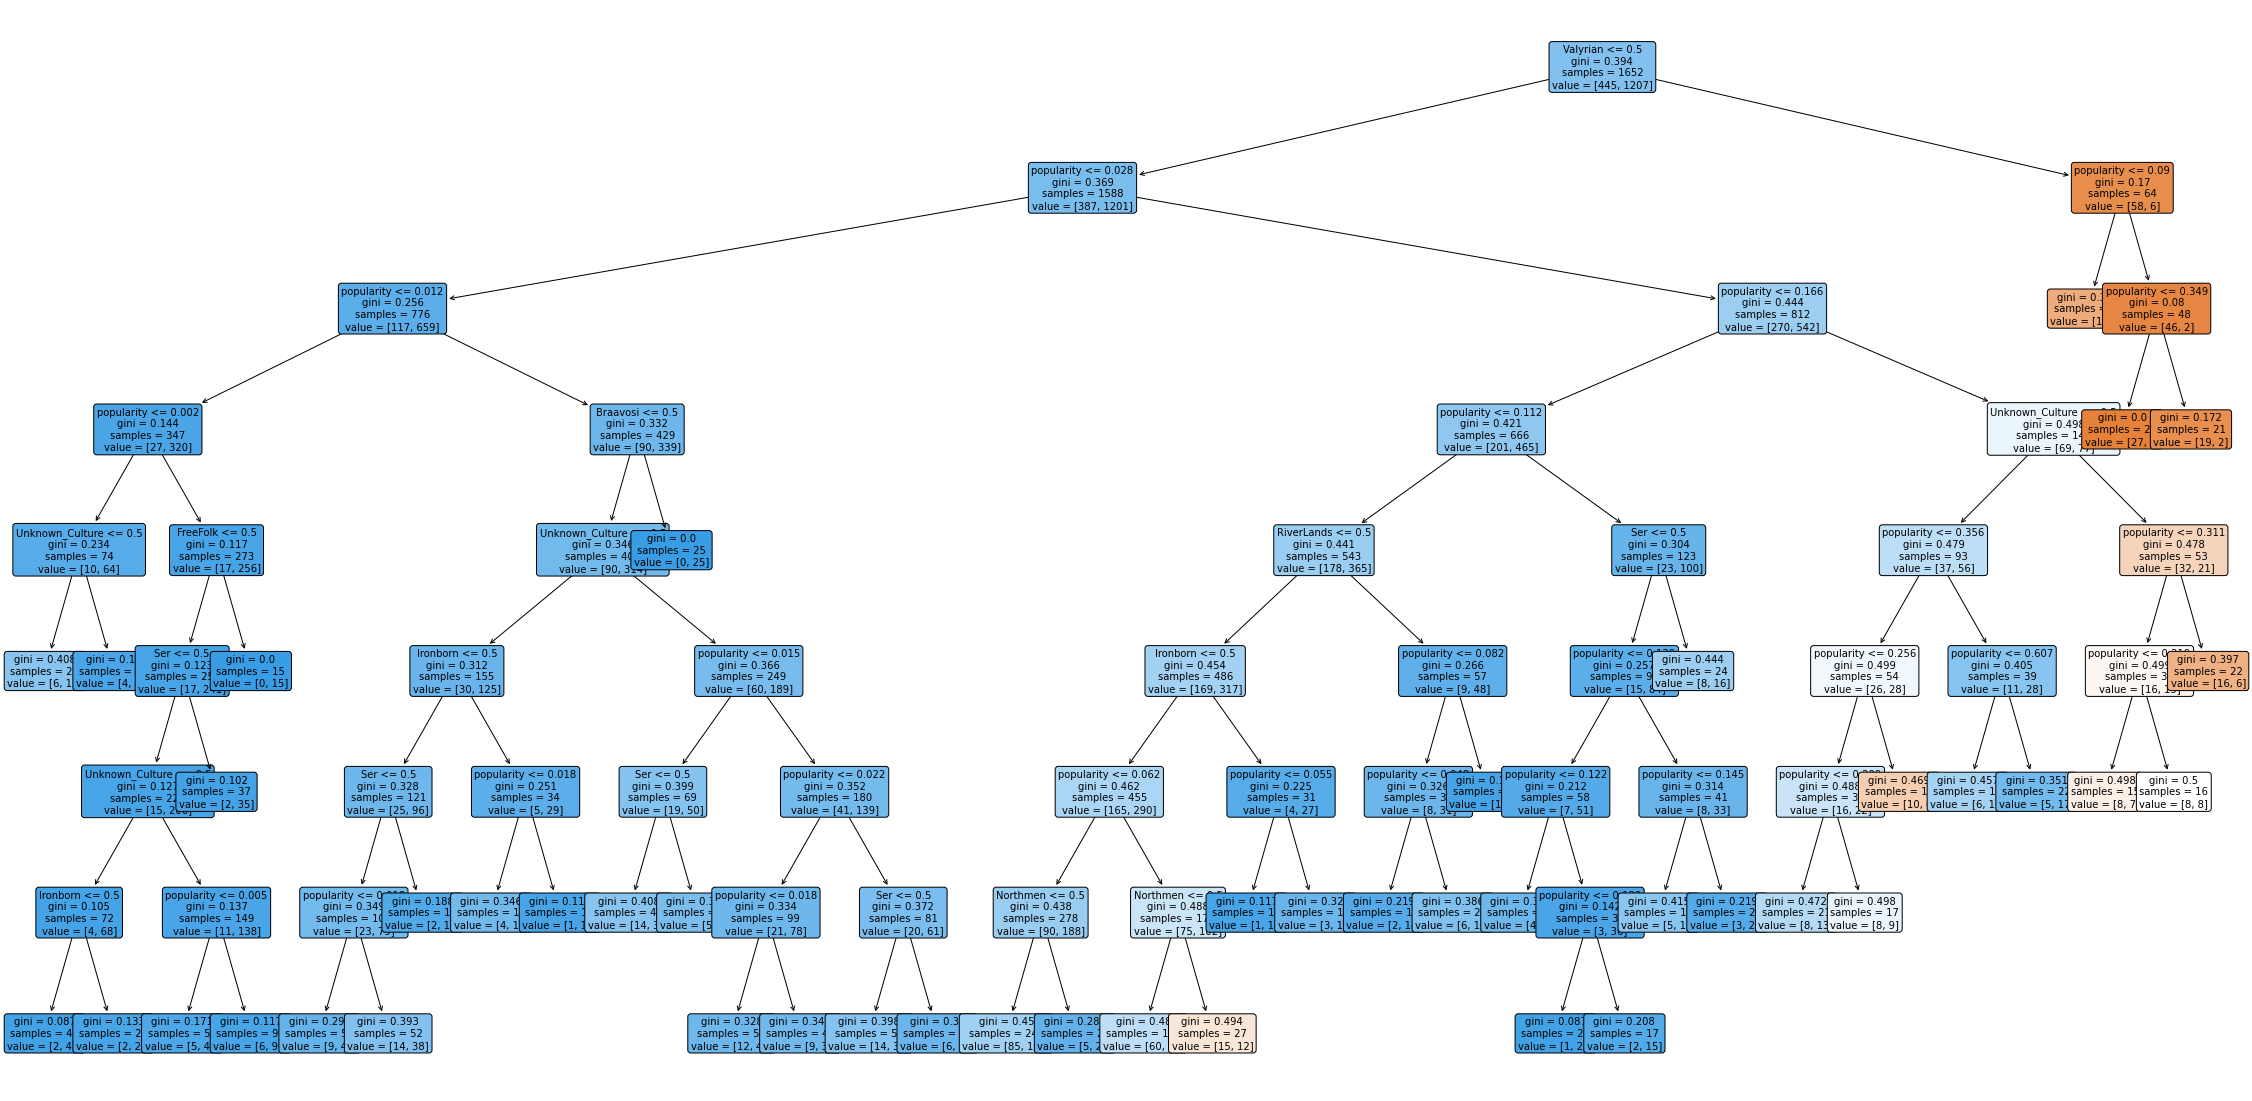

In [40]:
# setting figure size
plt.figure(figsize=(40, 20)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = new_got_data.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 10)


# rendering the plot
plt.show()

In [41]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 5000,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [42]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# saving scoring data for future use
rf_train_score = rf_default_fit.score(x_train, y_train).round(4) # accuracy # CHANGE TO pruned_tree_pred
rf_test_score  = rf_default_fit.score(x_test, y_test).round(4) # accuracy # CHANGE TO pruned_tree_pred

print('RandomForest Train-Test Gap   :', abs(rf_train_score - rf_test_score).round(4))
rf_test_gap = abs(rf_train_score - rf_test_score).round(4)


# saving auc score
rf_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = rf_default_fit_pred).round(4) # auc

Training ACCURACY: 0.7651
Testing  ACCURACY: 0.7663
AUC Score        : 0.57
RandomForest Train-Test Gap   : 0.0012


In [43]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 7
False Positives: 43
False Negatives: 0
True Positives : 134



In [44]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

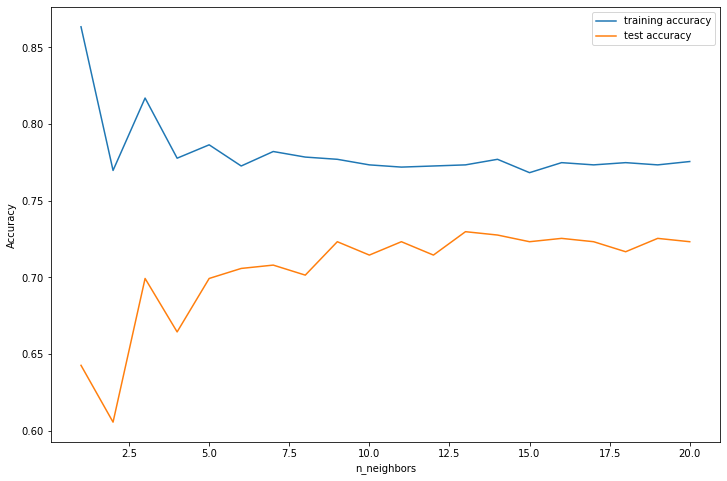

The optimal number of neighbors is: 13


In [45]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = new_got_data,
                                  y_data        = new_got_target,
                                  response_type = 'class')

In [46]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(new_got)


# TRANSFORMING the data
x_scaled     = scaler.transform(new_got)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            new_got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = new_got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 13)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


print('KNN Train-Test Gap   :', abs(knn_train_score - knn_test_score).round(4))
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.9479
Testing  ACCURACY: 0.9674
AUC Score        : 0.94
KNN Train-Test Gap   : 0.0195


In [47]:
# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 44
False Positives: 6
False Negatives: 0
True Positives : 134



In [48]:
#checking the parameters of Kneighborsclassifier for hyperparameter tuning
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

In [49]:
# creating a hyperparameter grid
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
                'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


# INSTANTIATING the model object without hyperparameters
tuned_knn = KNeighborsClassifier()


# RandomizedSearchCV object
tuned_knn_cv = RandomizedSearchCV(estimator             = tuned_knn,
                                   param_distributions   = grid_params,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_knn_cv.fit(new_got_data, new_got_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_knn_cv.best_params_)
print("Tuned Training AUC:", tuned_knn_cv.best_score_.round(4))

C:\Users\Jinina Rei Garcia\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=1000. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'minkowski'}
Tuned Training AUC: 0.5591


In [53]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
knn_tuned = KNeighborsClassifier(weights= 'uniform', n_neighbors= 5, metric= 'minkowski')


# FITTING to the FULL DATASET (due to cross-validation)
knn_tuned_fit = knn_tuned.fit(new_got_data, new_got_target)


# PREDICTING based on the testing set
knn_tuned_pred = knn_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', knn_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', knn_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_tuned_pred).round(4))


# saving scoring data for future use
knn_tuned_train_score = knn_tuned.score(x_train, y_train).round(4) # accuracy
knn_tuned_test_score  = knn_tuned.score(x_test, y_test).round(4)   # accuracy

# PREDICT step is not needed
print('KNN Train-Test Gap   :', abs(knn_tuned_train_score - knn_tuned_test_score).round(4))
knn_tuned_test_gap = abs(knn_tuned_train_score - knn_tuned_test_score).round(4)

# saving the AUC score
knn_tuned_auc_score         = roc_auc_score(y_true  = y_test,
                                       y_score = knn_tuned_pred).round(4) # auc

Training ACCURACY: 0.7918
Testing  ACCURACY: 0.7935
AUC Score        : 0.689
KNN Train-Test Gap   : 0.0017


In [51]:
# unpacking the confusion matrix
knn_tuned_tn, \
knn_tuned_fp, \
knn_tuned_fn, \
knn_tuned_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tuned_tn}
False Positives: {knn_tuned_fp}
False Negatives: {knn_tuned_fn}
True Positives : {knn_tuned_tp}
""")


True Negatives : 44
False Positives: 6
False Negatives: 0
True Positives : 134



In [58]:
# comparing results
print(f"""
Model           AUC Score\t\tTrainAcc\tTestAcc\t\tTrain-Test-Gap\t\tTN, FP, FN, TP
-----           ---------\t\t--------\t-------\t\t--------------\t\t--------------
LogisticRegression  {logreg_auc_score}\t\t{logreg_train_score}\t\t{logreg_test_score}\t\t{logreg_test_gap}\t\t\t{logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Pruned Tree         {pruned_tree_auc_score}\t\t{pruned_tree_train_score}\t\t{pruned_tree_test_score}\t\t{pruned_tree_test_gap}\t\t\t{pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
RandomForest        {rf_auc_score}\t\t{rf_train_score}\t\t{rf_test_score}\t\t{rf_test_gap}\t\t\t{rf_tn,rf_fp,rf_fn,rf_tp}
KNN ***             {knn_auc_score}\t\t{knn_train_score}\t\t{knn_test_score}\t\t{knn_test_gap}\t\t\t{knn_tn,knn_fp,knn_fn,knn_tp}
KNN tuned           {knn_tuned_auc_score}\t\t{knn_tuned_train_score}\t\t{knn_tuned_test_score}\t\t{knn_tuned_test_gap}\t\t\t{knn_tuned_tn,knn_tuned_fp,knn_tuned_fn,knn_tuned_tp}

***Final model
""")


Model           AUC Score		TrainAcc	TestAcc		Train-Test-Gap		TN, FP, FN, TP
-----           ---------		--------	-------		--------------		--------------
LogisticRegression  0.58		0.7669		0.7717		0.0048			(8, 42, 0, 134)
Pruned Tree         0.6339		0.773		0.7772		0.0042			(16, 34, 7, 127)
RandomForest        0.57		0.7651		0.7663		0.0012			(7, 43, 0, 134)
KNN ***             0.94		0.9479		0.9674		0.0195			(44, 6, 0, 134)
KNN tuned           0.689		0.7918		0.7935		0.0017			(44, 6, 0, 134)

***Final model

